In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_csv("email_data.csv")

data = raw_data.where(pd.notnull(raw_data),'')

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.loc[data["Category"] == "spam" , ["Category"]] = 0

data.loc[data["Category"] == "ham" , ["Category"]] = 1

data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [5]:
x = data["Message"]

y = data["Category"]

x,y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                 Will ü b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: Message, Length: 5572, dtype: object,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 5567    0
 5568    1
 5569    1
 5570    1
 5571    1
 Name: Category, Length: 5572, dtype: object)

### Sentence analysis

In [6]:
print(type(x))


<class 'pandas.core.series.Series'>


In [7]:
sent_tokens = []
sent_lens = []
max_tokens = -1
min_tokens = -1
new_x = []
new_y = []
for i in range(len(x)):
    text = x[i]
    tokens = text.split()
    sent_tokens.append(tokens)
    sent_lens.append(len(tokens))
    if len(tokens)>max_tokens:
        max_tokens = len(tokens)
        max_str = tokens
    if len(tokens)<min_tokens or min_tokens==-1:
        min_tokens = len(tokens)
        min_str = tokens
    if len(tokens) <= 50 : 
        new_x.append(text)
        new_y.append(y[i])
print("Max Tokens: ", max_tokens)
print("Min Tokens: ", min_tokens)
print("Average Tokens: ", sum(sent_lens)/len(sent_lens))
print()
print(len(new_x),len(new_y))
x.shape

Max Tokens:  171
Min Tokens:  1
Average Tokens:  15.584170854271356

5509 5509


(5572,)

In [8]:
sent_bins = {}
for sent_len in sent_lens:
    if sent_len not in sent_bins:
        sent_bins[sent_len] = 1
    else:
        sent_bins[sent_len] += 1
print("# Bins: ", len(sent_bins))
    

# Bins:  83


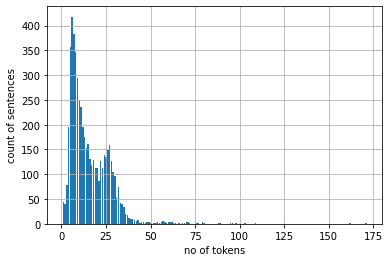

In [9]:
plt.bar(sent_bins.keys(), sent_bins.values())
plt.xlabel("no of tokens")
plt.ylabel("count of sentences")
plt.grid()
plt.show()

## New Model


In [10]:
train_ds_x , test_ds_x , train_ds_y , test_ds_y = train_test_split(new_x , new_y , test_size = .2 , random_state=3)

In [11]:
data_trans = TfidfVectorizer(stop_words= 'english' , lowercase = 'True')

In [12]:

train_ds_x = data_trans.fit_transform(train_ds_x)
test_ds_x = data_trans.transform(test_ds_x)


In [13]:
new_model = LogisticRegression()

In [14]:
new_model.fit(train_ds_x,train_ds_y)

LogisticRegression()

In [15]:
accuracy_score( new_model.predict(train_ds_x) , train_ds_y)

0.9668708872248696

In [16]:
accuracy_score( new_model.predict(test_ds_x) , test_ds_y)

0.9600725952813067

In [17]:
if new_model.predict(data_trans.transform([input()])) :
    print("ham")
else:
    print("spam")

Congratulations, you have been gifted 0.5 BTC. Click here to claim it now!
ham


In [18]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .2 ,random_state = 3)

In [19]:
print(x_train)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object
(1115,)
(4457,)
(1115,)


In [20]:
data_transform = TfidfVectorizer(lowercase = 'True',stop_words = 'english')

data_transform

TfidfVectorizer(lowercase='True', stop_words='english')

In [21]:
x_train_transform = data_transform.fit_transform(x_train)

x_test_transform = data_transform.transform(x_test)

y_train_transform = y_train.astype('int')

y_test_transform = y_test.astype('int')

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train_transform , y_train_transform)

LogisticRegression()

In [24]:
training_prediction = model.predict(x_train_transform) 

print(y_train_transform)

print(training_prediction)

training_accuracy = accuracy_score(training_prediction , y_train_transform)

training_accuracy

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: int32
[1 1 1 ... 1 1 0]


0.9670181736594121

In [25]:
test_accuracy = accuracy_score(model.predict(x_test_transform) , y_test_transform)

test_accuracy

0.9659192825112107

In [26]:
mail = [input()]


mail = data_transform.transform(mail)

prediction = model.predict(mail)

print()
if prediction[0]==1:
    print("HAM MAIL")
else:
    print("SPAM MAIL")


Congratulations, you have been gifted 0.5 BTC. Click here to claim it now!

HAM MAIL


In [27]:
new_sent = []
word_count = []
max_words = 0
min_words = 0
for i in new_x :
    token_list = i.split()
    new_sent.append(token_list)
    count = len(token_list)
    word_count.append(count)
    if max_words < count:
        max_words = count
    if min_words > count or min_words == 0:
        min_words = count
print("max no of words : ",max_words)
print("min no of words : ",min_words)
print("avg : ",sum(word_count)/len(word_count))

max no of words :  50
min no of words :  1
avg :  14.931021964058813


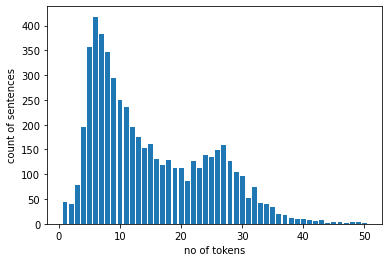

50

In [28]:
from collections import Counter
bin2 = dict(Counter(word_count))
plt.bar(bin2.keys() , bin2.values())
plt.xlabel("no of tokens")
plt.ylabel("count of sentences")
plt.show()
len(bin2)